In [1]:
pip install opencv-contrib-python


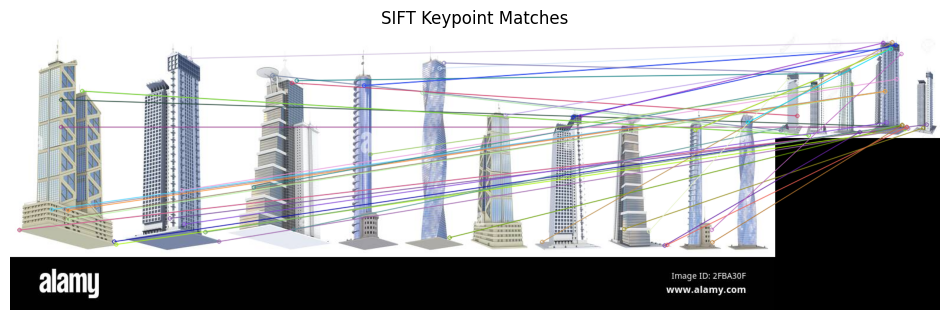

In [3]:
import cv2
import matplotlib.pyplot as plt


image1 = cv2.imread('/content/building_images3.jpg')
image2 = cv2.imread('/content/building image2.jpeg')


gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)


good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


matched_img = cv2.drawMatches(image1, kp1, image2, kp2, good_matches, None, flags=2)

plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoint Matches')
plt.axis('off')
plt.show()


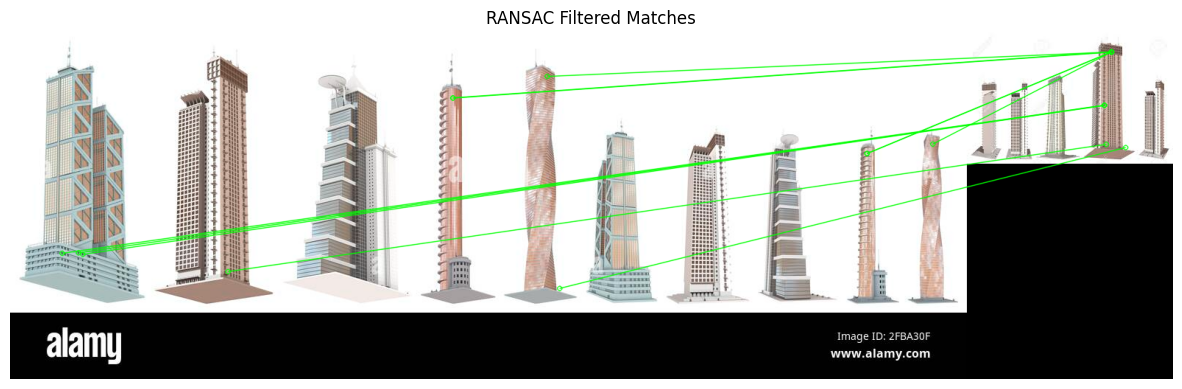

In [5]:
import numpy as np
index_params = dict(algorithm=1, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good_matches = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)


H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
matches_mask = mask.ravel().tolist()


ransac_filtered = cv2.drawMatches(
    image1, kp1, image2, kp2, good_matches, None,
    matchColor=(0, 255, 0),
    singlePointColor=None,
    matchesMask=matches_mask,
    flags=2
)

plt.figure(figsize=(15, 7))
plt.title("RANSAC Filtered Matches")
plt.imshow(ransac_filtered)
plt.axis('off')
plt.show()


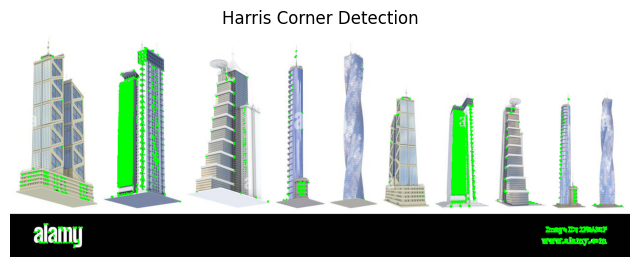

In [6]:
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

image_harris = image1.copy()
image_harris[dst > 0.01 * dst.max()] = [0, 255, 0]

plt.figure(figsize=(8, 6))
plt.title("Harris Corner Detection")
plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
